In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import classification_report, plot_roc_curve
from sklearn.pipeline import make_pipeline

### Step1.Data Collection

In [4]:
df = pd.read_csv('../data/heart.csv')
df.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Step2.Data Validation

In [6]:
print('There is no any missing values in the selected dataset')
df.isnull().sum()

There is no any missing values in the selected dataset


age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
print(f'In the dataset,generally,there are {df.shape[0]} records and {df.shape[1]} features')

In [15]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

### Step3.Data Visualizaion

<AxesSubplot:>

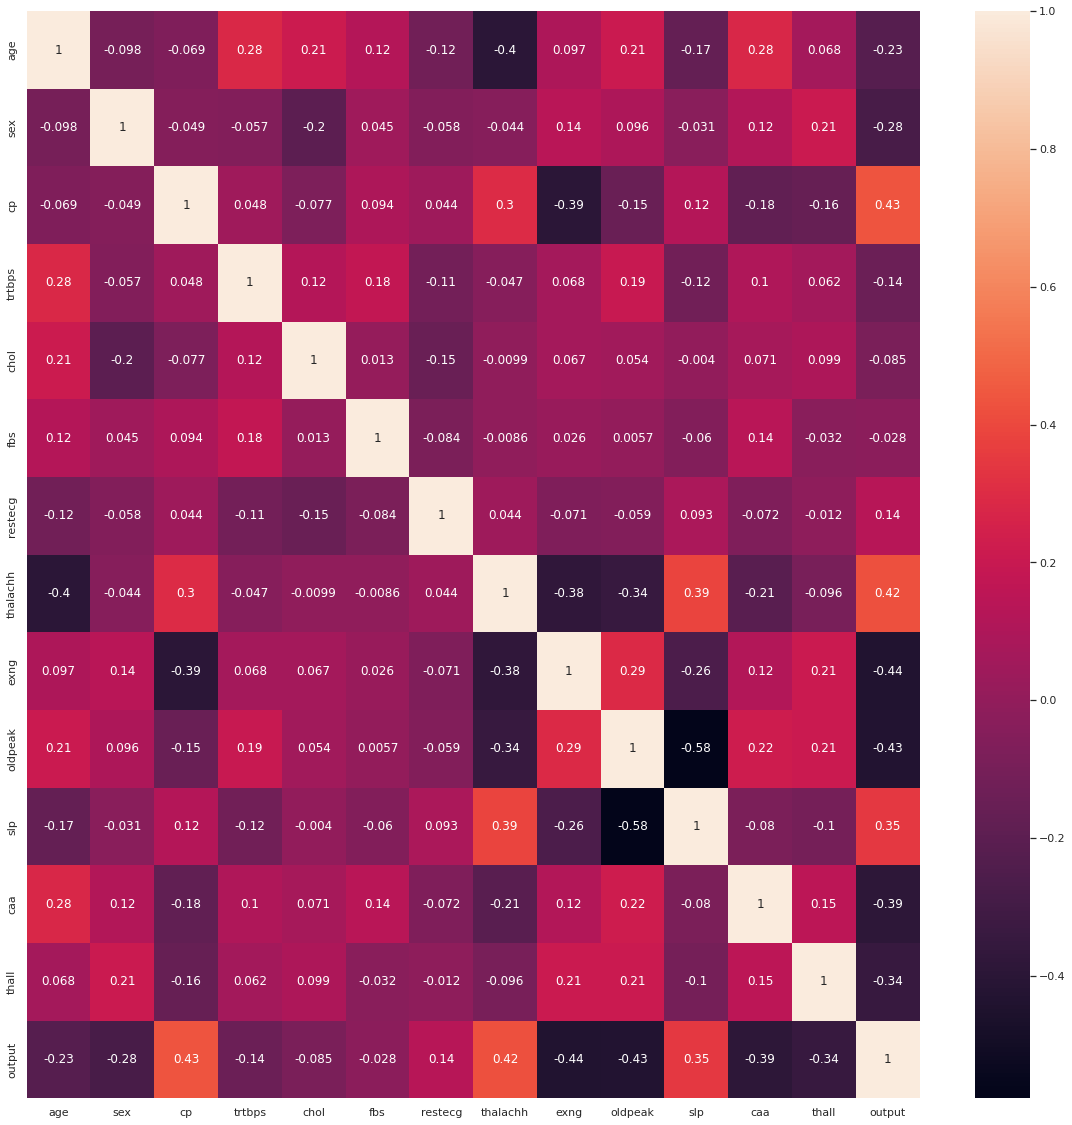

In [54]:
plt.figure(figsize=(20,20))
sbn.heatmap(df.corr(), annot=True, fmt=)

In [55]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [58]:
X.shape,y.shape

((303, 13), (303,))

In [59]:
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [63]:
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [66]:
pipeline = make_pipeline(RobustScaler())
LR = make_pipeline(pipeline, LogisticRegression(random_state=0))
KN = make_pipeline(pipeline, KNeighborsClassifier()) 
NB = make_pipeline(pipeline, GaussianNB())
DT = make_pipeline(pipeline, DecisionTreeClassifier(random_state=0))
RF = make_pipeline(pipeline, RandomForestClassifier(random_state=0))
AC = make_pipeline(pipeline, AdaBoostClassifier(random_state=0))
SV = make_pipeline(pipeline, SVC(random_state=0)) 

In [67]:
model_dictionary = {
    'Logistic_Regression':LR,
    'DecisionTree_Classifier':DT,
    'RandomForest_classifier':RF,
    'Adaboost_Classifier':AC,
    'Naivebayes_Classifier':NB,
    'KNeighbors_classifier':KN,
    'Support_Vector':SV
}

In [79]:
def model_fitting(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'Accuracy of the model is {accuracy_score(y_test,y_pred)*100}')
    print('---------------------------------------------------')
    print('confusion matrix is:', confusion_matrix(y_test, y_pred))
    print('classification report:\n', classification_report(y_test, y_pred))

In [80]:
for name, model in model_dictionary.items():
    print(name)
    model_fitting(model)

Logistic_Regression
Accuracy of the model is 83.60655737704919
---------------------------------------------------
confusion matrix is: [[21  6]
 [ 4 30]]
classification report:
               precision    recall  f1-score   support

           0       0.84      0.78      0.81        27
           1       0.83      0.88      0.86        34

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61

DecisionTree_Classifier
Accuracy of the model is 78.68852459016394
---------------------------------------------------
confusion matrix is: [[22  5]
 [ 8 26]]
classification report:
               precision    recall  f1-score   support

           0       0.73      0.81      0.77        27
           1       0.84      0.76      0.80        34

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      

In [81]:
model = AdaBoostClassifier(random_state=0)
model.fit(X_train, y_train)

AdaBoostClassifier(random_state=0)

In [82]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9016393442622951

In [85]:
def find_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    sbn.heatmap(cm, annot=True, cmap='OrRd')
    plt.title('Confusion Matrix', weight='bold')
    print(classification_report(y_test, y_pred))
    plot_roc_curve(model, X_test, y_test)

              precision    recall  f1-score   support

           0       0.86      0.93      0.89        27
           1       0.94      0.88      0.91        34

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



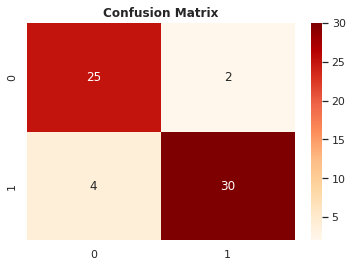

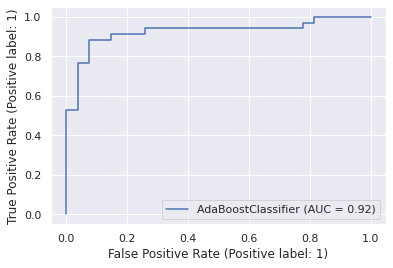

In [86]:
find_confusion_matrix(y_test, y_pred)